# Importando librerías

In [1]:
import pandas as pd
import numpy as np
# Valores faltantes
import missingno as msno
# Atípicos
import matplotlib.pyplot as plt
import seaborn as sns

# Importando las bases de datos

In [2]:
df_title_basics_1 = pd.read_csv('./db/title.basics.tsv', sep='\t', on_bad_lines='skip', dtype={'columna_4': 'str'})

c:\Users\ASUS\OneDrive\Documentos\1aaaaEsposo_Jaime\U_Trabajo\perfilPython\mi_entorno\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Usar el encoding adecuado (por ejemplo, 'ISO-8859-1' o 'latin1')
with open('./db/title.basics.tsv', 'r', encoding='ISO-8859-1') as file:
    lines = file.readlines()
    print(lines[:1])

In [ ]:
# Usar el encoding adecuado (por ejemplo, 'ISO-8859-1' o 'latin1')
with open('./db/title.basics.tsv', 'r', encoding='ISO-8859-1') as file:
    lines = file.readlines()
    print(lines[-1:])

# Exploración de datos

In [3]:
df_title_basics_1.shape
#(11278847, 9)
# Luego de eliminar 6 datos con 13 valores faltantes
#(11278834, 7)


(11278847, 9)

In [4]:
df_title_basics_1.tail(3)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
11278844,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
11278845,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short
11278846,tt9916880,tvEpisode,Horrid Henry Knows It All,Horrid Henry Knows It All,0,2014,\N,10,"Adventure,Animation,Comedy"


##### Reemplazar para que numpy entienda valores faltantes

In [3]:
df_title_basics_1.replace({'\\N': np.nan}, inplace=True)

# Valores nulos

<AxesSubplot:>

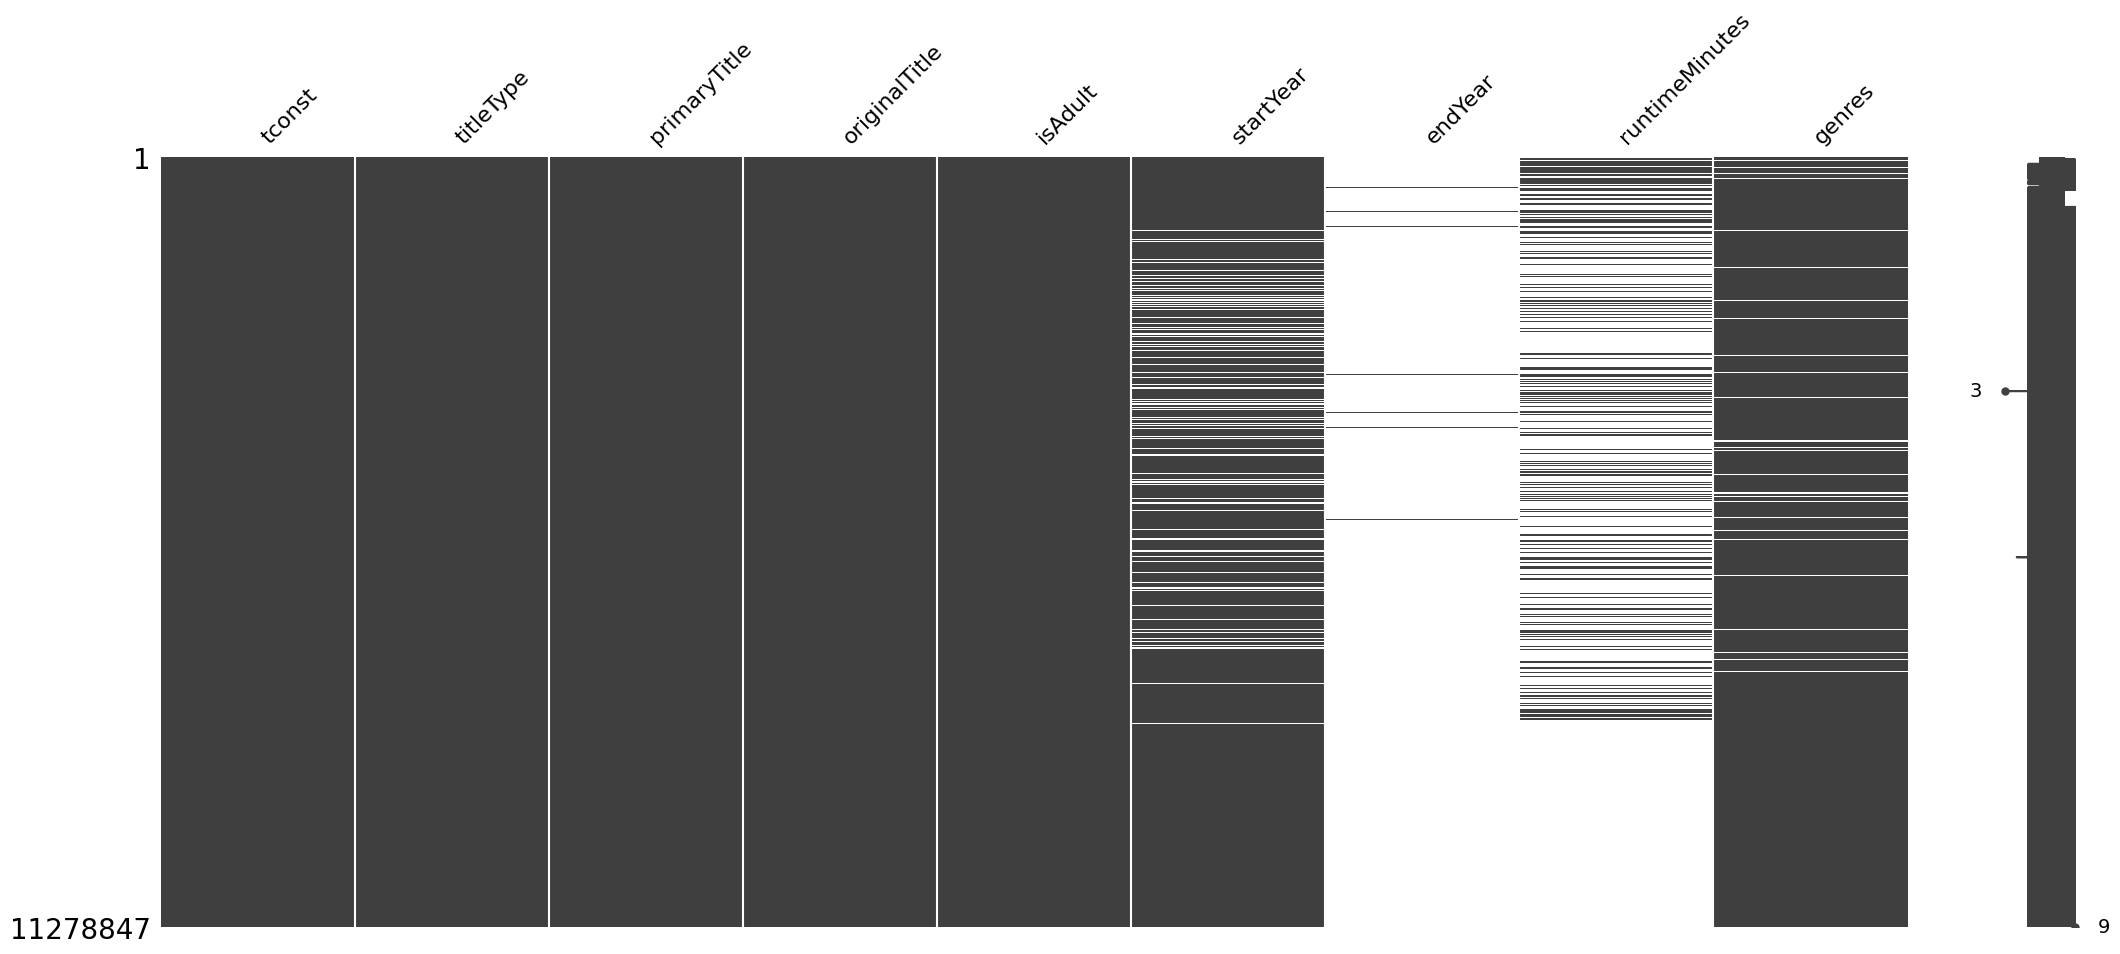

In [4]:
# Matriz de valores faltantes

msno.matrix(df_title_basics_1)

In [29]:
df_nulos_title_basics_1 = df_title_basics_1.isnull().sum()

df_nulos_title_basics_1

tconst            0
titleType         0
primaryTitle     12
originalTitle    12
isAdult           1
startYear         0
genres            0
dtype: int64

###### Imputaciones

In [5]:
# Rellenar valores nulos con "Desconocido"
df_title_basics_1['genres'].fillna('Desconocido', inplace=True)

In [6]:
# Calcular el valor más frecuente en startYear
modo_startYear = df_title_basics_1['startYear'].mode()[0]

# Imputar valores faltantes en startYear con el valor más frecuente
df_title_basics_1['startYear'].fillna(modo_startYear, inplace=True)

###### Eliminar

In [7]:
df_title_basics_1.drop(columns=['endYear','runtimeMinutes'], inplace=True)

In [8]:
# Eliminar filas con valores faltantes en primaryTitle y originalTitle
df_title_basics_1 = df_title_basics_1.dropna(subset=['primaryTitle', 'originalTitle','isAdult'])


In [9]:
df_title_basics_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11278834 entries, 0 to 11278846
Data columns (total 7 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tconst         object
 1   titleType      object
 2   primaryTitle   object
 3   originalTitle  object
 4   isAdult        object
 5   startYear      object
 6   genres         object
dtypes: object(7)
memory usage: 688.4+ MB


# Crear tabla generos

In [10]:
import pandas as pd

# Suponiendo que ya has cargado tu DataFrame df_title_basics_1

# Crear un DataFrame para los géneros únicos
genres_unique = pd.DataFrame({
    'genre_id': range(1, 31),
    'genre': ['Drama', 'Comedy', 'Talk-Show', 'Short', 'Documentary', 'News', 'Romance', 'Family', 'Reality-TV',
              'Animation', 'Desconocido', 'Crime', 'Action', 'Adventure', 'Game-Show', 'Music', 'Adult', 'Sport',
              'Fantasy', 'Mystery', 'Horror', 'Thriller', 'History', 'Biography', 'Sci-Fi', 'Musical', 'War',
              'Western', 'Film-Noir','Desconocido']
})

print(genres_unique)




    genre_id        genre
0          1        Drama
1          2       Comedy
2          3    Talk-Show
3          4        Short
4          5  Documentary
5          6         News
6          7      Romance
7          8       Family
8          9   Reality-TV
9         10    Animation
10        11  Desconocido
11        12        Crime
12        13       Action
13        14    Adventure
14        15    Game-Show
15        16        Music
16        17        Adult
17        18        Sport
18        19      Fantasy
19        20      Mystery
20        21       Horror
21        22     Thriller
22        23      History
23        24    Biography
24        25       Sci-Fi
25        26      Musical
26        27          War
27        28      Western
28        29    Film-Noir
29        30  Desconocido


##### Normalizar los Datos de df_title_basics_1

In [11]:
# Descomponer la columna genres
df_expanded_title_basics_1 = df_title_basics_1.assign(genres=df_title_basics_1['genres'].str.split(',')).explode('genres')

# Unir con la tabla de géneros únicos para obtener los IDs de géneros
df_expanded_title_basics_1 = pd.merge(df_expanded_title_basics_1, genres_unique, left_on='genres', right_on='genre', how='left')

# Eliminar la columna genres original y renombrar la columna genre_id
df_expanded_title_basics_1 = df_expanded_title_basics_1.drop(columns=['genres', 'genre']).rename(columns={'genre_id': 'genre_id'})




# Before cleand an normalized

<AxesSubplot:>

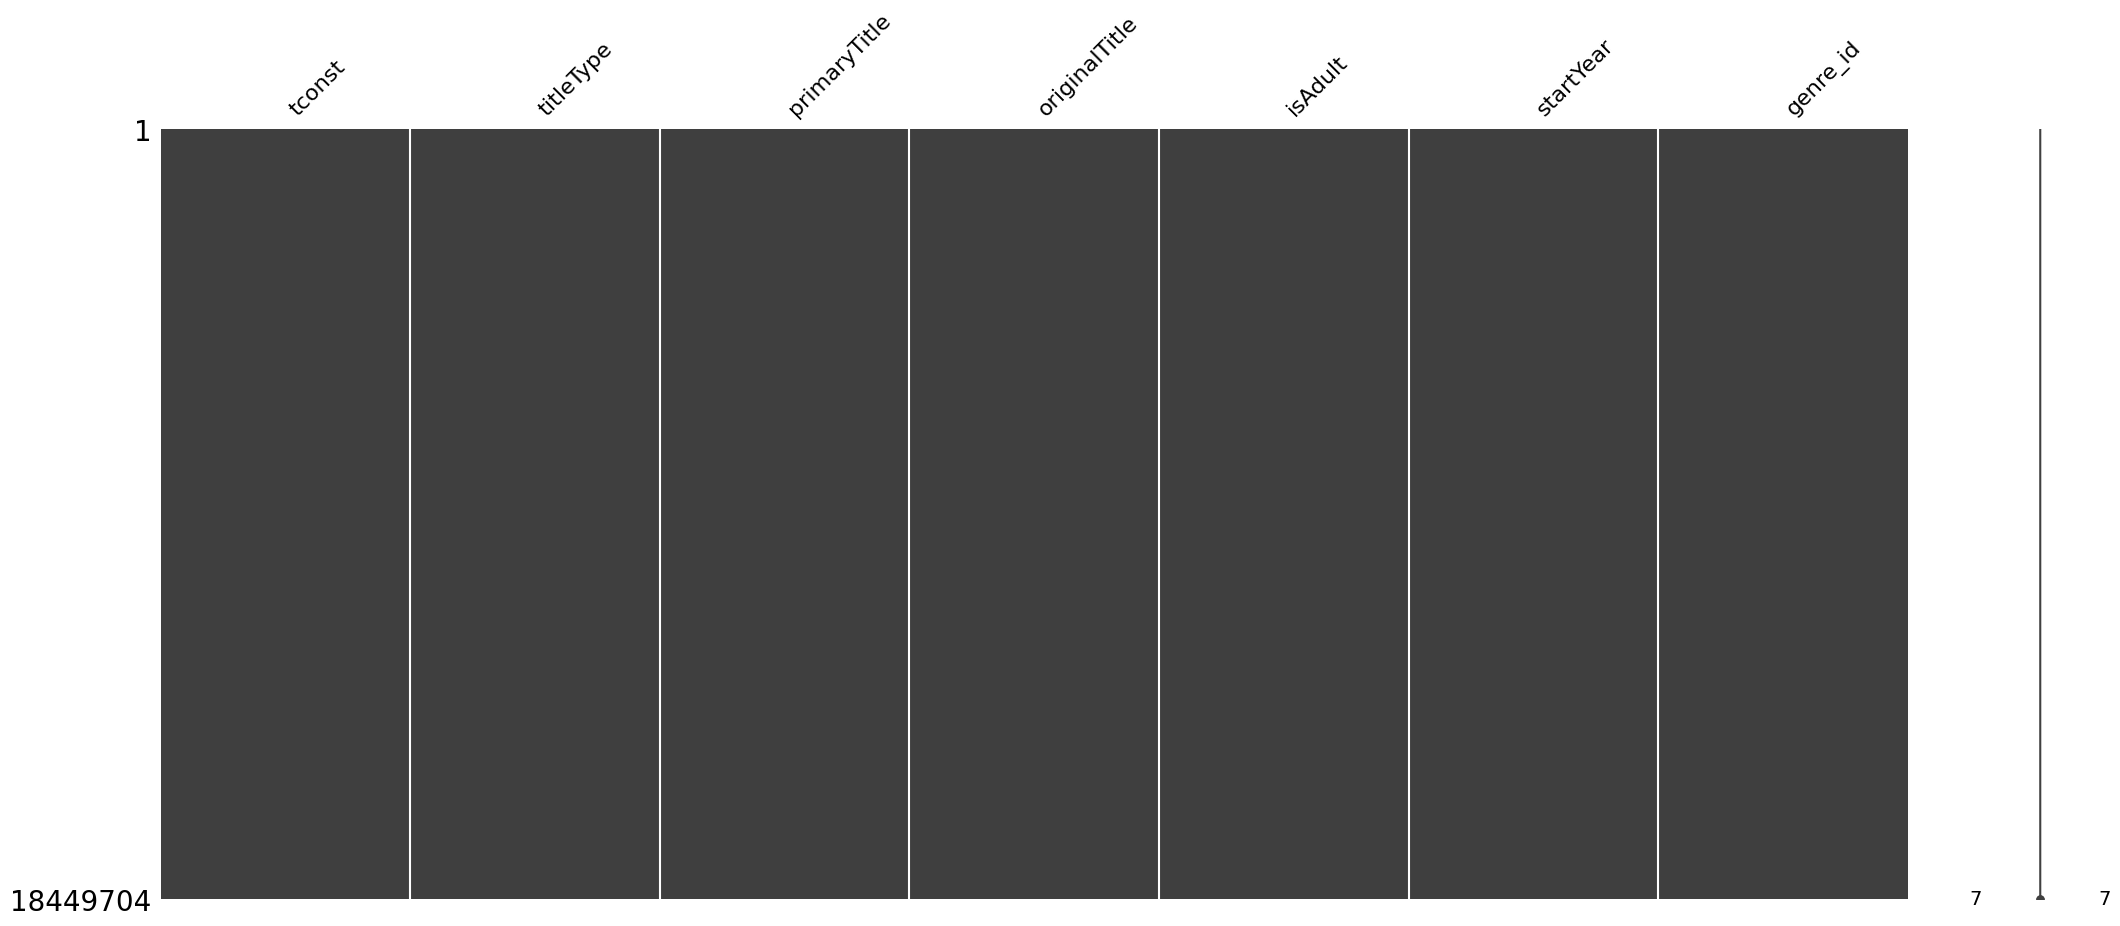

In [14]:
msno.matrix(df_expanded_title_basics_1)

In [13]:
df_expanded_title_basics_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18449704 entries, 0 to 18449703
Data columns (total 7 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tconst         object
 1   titleType      object
 2   primaryTitle   object
 3   originalTitle  object
 4   isAdult        object
 5   startYear      object
 6   genre_id       int64 
dtypes: int64(1), object(6)
memory usage: 1.1+ GB


In [ ]:
df_expanded_title_basics_1.tail(13)

# Exportando datos

In [14]:
# Guardar la tabla de géneros únicos en un archivo CSV
genres_unique.to_csv('genre_origin.csv', index=False)

In [36]:
# Guardar el DataFrame normalizado en un archivo CSV
df_expanded_title_basics_1.to_csv('title_basics_1.csv', index=False)

###### 1er millon

In [12]:
# Seleccionar los primeros 1,000,000 de registros
df_first_million = df_expanded_title_basics_1.iloc[:1000000]

# Guardar el resultado en un nuevo archivo CSV
df_first_million.to_csv('title_basics_first_million.csv', index=False)

print("El archivo con el primer millón de registros ha sido creado: 'title_basics_first_million.csv'")

El archivo con el primer millón de registros ha sido creado: 'title_basics_first_million.csv'


###### 1 millon a 3 millones

In [15]:
# Seleccionar registros desde 1,000,000 hasta 3,000,000
df_second_million = df_expanded_title_basics_1.iloc[1000000:3000000]

# Guardar el resultado en un nuevo archivo CSV
df_second_million.to_csv('title_basics_second_million.csv', index=False)

print("El archivo ha sido creado")


El archivo ha sido creado


###### 3 millon a 5 millones

In [17]:
# Seleccionar registros desde 1,000,000 hasta 3,000,000
df_third_million = df_expanded_title_basics_1.iloc[3000000:5000000]

# Guardar el resultado en un nuevo archivo CSV
df_third_million.to_csv('title_basics_third_million.csv', index=False)

print("El archivo ha sido creado")

El archivo ha sido creado


###### 5 millon a 7 millones

In [18]:
# Seleccionar registros desde 1,000,000 hasta 3,000,000
df_fourth_million = df_expanded_title_basics_1.iloc[5000000:7000000]

# Guardar el resultado en un nuevo archivo CSV
df_fourth_million.to_csv('title_basics_fourth_million.csv', index=False)

print("El archivo ha sido creado")

El archivo ha sido creado


###### 7 millon a 9 millones

In [19]:
# Seleccionar registros desde 1,000,000 hasta 3,000,000
df_five_million = df_expanded_title_basics_1.iloc[7000000:9000000]

# Guardar el resultado en un nuevo archivo CSV
df_five_million.to_csv('title_basics_five_million.csv', index=False)

print("El archivo ha sido creado")

El archivo ha sido creado


###### 9 millon a 11 millones

In [20]:
# Seleccionar registros desde 1,000,000 hasta 3,000,000
df_six_million = df_expanded_title_basics_1.iloc[9000000:11000000]

# Guardar el resultado en un nuevo archivo CSV
df_six_million.to_csv('title_basics_six_million.csv', index=False)

print("El archivo ha sido creado")

El archivo ha sido creado


###### 11 millon a 13 millones

In [21]:
# Seleccionar registros desde 1,000,000 hasta 3,000,000
df_seven_million = df_expanded_title_basics_1.iloc[11000000:13000000]

# Guardar el resultado en un nuevo archivo CSV
df_seven_million.to_csv('title_basics_seven_million.csv', index=False)

print("El archivo ha sido creado")

El archivo ha sido creado


###### 13 millon a 15 millones

In [22]:
# Seleccionar registros desde 1,000,000 hasta 3,000,000
df_eight_million = df_expanded_title_basics_1.iloc[13000000:15000000]

# Guardar el resultado en un nuevo archivo CSV
df_eight_million.to_csv('title_basics_eight_million.csv', index=False)

print("El archivo ha sido creado")

El archivo ha sido creado


###### 15 millon a 17 millones

In [23]:
# Seleccionar registros desde 1,000,000 hasta 3,000,000
df_nine_million = df_expanded_title_basics_1.iloc[15000000:17000000]

# Guardar el resultado en un nuevo archivo CSV
df_nine_million.to_csv('title_basics_nine_million.csv', index=False)

print("El archivo ha sido creado")

El archivo ha sido creado


###### 17 millon a 19 millones

In [24]:
# millones 11278834

# Seleccionar registros desde 1,000,000 hasta 3,000,000
df_ten_million = df_expanded_title_basics_1.iloc[17000000:18449703]

# Guardar el resultado en un nuevo archivo CSV
df_ten_million.to_csv('title_basics_ten_million.csv', index=False)

print("El archivo ha sido creado")

El archivo ha sido creado
